Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [182]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

In [183]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [184]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [185]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [187]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

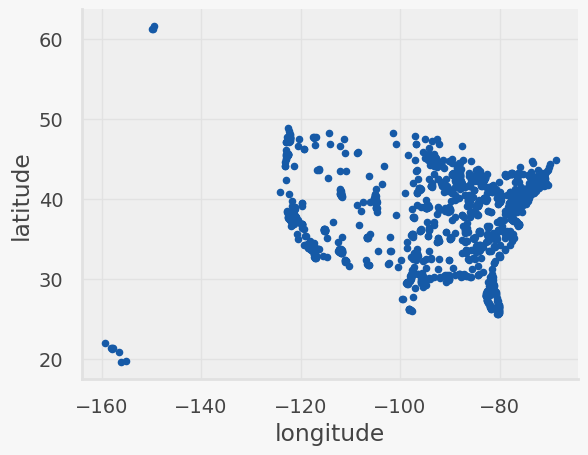

In [188]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [189]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [190]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [191]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [192]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [193]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [194]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

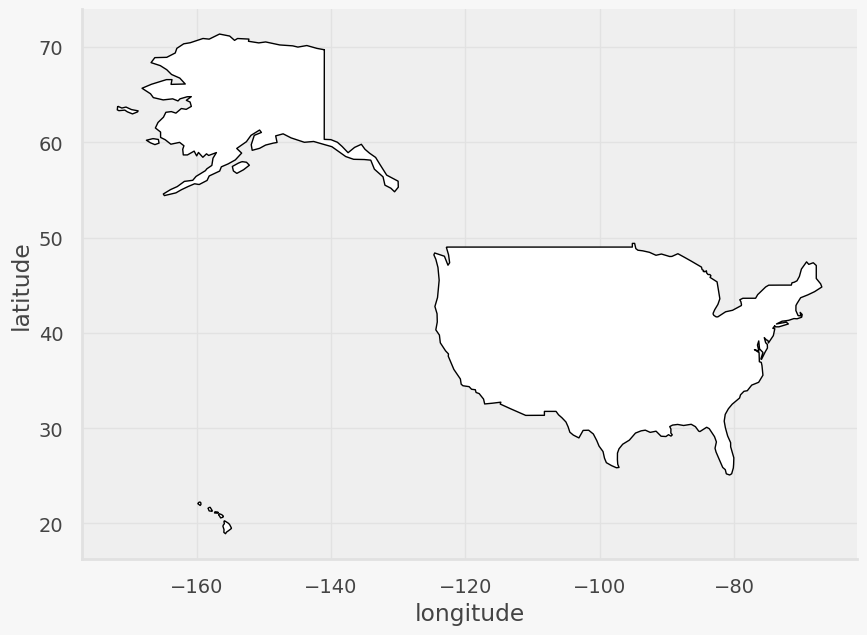

In [195]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

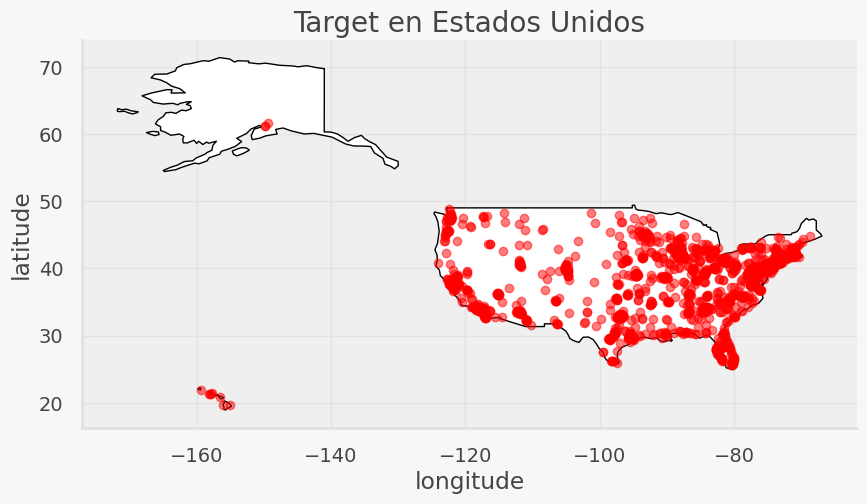

In [196]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [197]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [198]:
m=list(zip(df.longitude, df.latitude))

In [199]:
m

[(-86.80417369999999, 33.2242254),
 (-86.98977789999999, 33.3345501),
 (-87.89593169999999, 30.6028747),
 (-86.9715595, 34.5601477),
 (-85.4464222, 31.2660613),
 (-87.6339077, 34.8420853),
 (-86.80555729999999, 33.6060399),
 (-87.6799946, 30.3039796),
 (-86.77509979999999, 33.467142),
 (-86.7562505, 34.7488201),
 (-86.1600739, 32.3606937),
 (-85.4050434, 32.6204324),
 (-85.7846536, 33.6092005),
 (-86.3957891, 32.4570652),
 (-87.51825509999999, 33.1923759),
 (-86.7125552, 33.425259),
 (-86.6376483, 33.6054494),
 (-86.8532462, 33.3616601),
 (-86.68163709999999, 34.7446779),
 (-86.5443483, 34.674648),
 (-88.1204442, 30.6709831),
 (-88.2260919, 30.6734013),
 (-149.4029599, 61.5779193),
 (-149.745967, 61.2299524),
 (-149.8814512, 61.13006249999999),
 (-114.5918998, 35.0528237),
 (-111.6591788, 35.1840575),
 (-111.7184273, 33.5733931),
 (-110.9601638, 32.3990239),
 (-112.4315678, 34.549193),
 (-111.6407335, 33.2552871),
 (-110.2558558, 31.5561559),
 (-112.3537192, 33.6368072),
 (-112.269511,

In [200]:
blob_centers = m

X, y = make_blobs(n_samples=1839, centers=blob_centers, cluster_std=0.20,
                  random_state=7)

In [201]:
print(X)

[[ -81.4511825    32.10571602]
 [ -86.52523118   36.01168885]
 [-123.13073166   45.71017966]
 ...
 [-122.75515253   45.67169298]
 [ -71.68181402   41.71902706]
 [ -73.6808068    40.98018108]]


In [202]:
X.shape

(1839, 2)

In [203]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

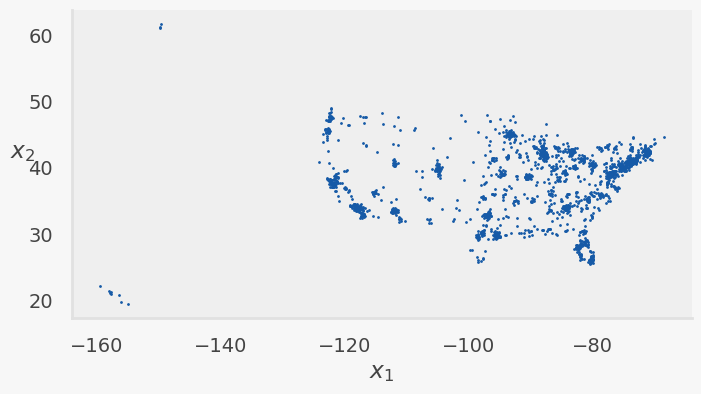

In [204]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In [205]:
y_pred

array([4, 0, 1, ..., 1, 3, 3])

In [206]:
y_pred is kmeans.labels_

True

In [207]:
Clusters=kmeans.cluster_centers_
Clusters

array([[ -88.38560066,   41.74051783],
       [-119.18772238,   37.56156168],
       [ -98.2896299 ,   34.37940884],
       [ -75.59459074,   40.33885587],
       [ -82.93798241,   31.07271813]])

In [208]:
def mappita(Clusters):
    Clusters = pd.DataFrame(Clusters, columns = ['Lat','Long'])
    Clusters["Coordinates"] = list(zip(Clusters.Lat, Clusters.Long))
    Clusters["Coordinates"] = Clusters["Coordinates"].apply(Point)
    gdf = gpd.GeoDataFrame(Clusters, geometry="Coordinates")
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
    fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
    world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
    gdf.plot(ax=gax, color='Blue', alpha = 0.5)

    gax.set_xlabel('longitude')
    gax.set_ylabel('latitude')
    gax.set_title('Target en Estados Unidos')

    gax.spines['top'].set_visible(False)
    gax.spines['right'].set_visible(False)

    return plt.show()

### Posicion de los almacenes propuestos

findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

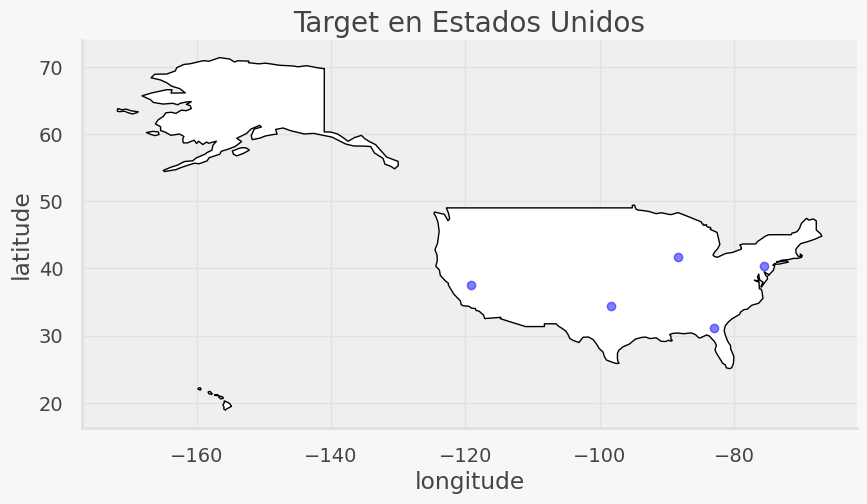

In [209]:
mappita(Clusters)

In [210]:
kmeans.inertia_

62068.76665807961

In [211]:
kmeans.transform(X).round(2)

array([[11.87, 38.13, 16.99, 10.1 ,  1.81],
       [ 6.02, 32.7 , 11.88, 11.76,  6.1 ],
       [34.97,  9.05, 27.3 , 47.84, 42.78],
       ...,
       [34.59,  8.86, 26.95, 47.46, 42.41],
       [16.7 , 47.69, 27.6 ,  4.15, 15.49],
       [14.72, 45.64, 25.48,  2.02, 13.56]])

In [212]:
np.linalg.norm(np.tile(X, (1, k)).reshape(-1, k, 2)
               - kmeans.cluster_centers_, axis=2).round(2)

array([[11.87, 38.13, 16.99, 10.1 ,  1.81],
       [ 6.02, 32.7 , 11.88, 11.76,  6.1 ],
       [34.97,  9.05, 27.3 , 47.84, 42.78],
       ...,
       [34.59,  8.86, 26.95, 47.46, 42.41],
       [16.7 , 47.69, 27.6 ,  4.15, 15.49],
       [14.72, 45.64, 25.48,  2.02, 13.56]])

### Numero de linea de la tienda ma Cercana

In [213]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(Clusters, X)
closest

array([ 211,  152, 1624, 1822,  558], dtype=int64)

### Direccion de la tienda mas cercana

In [214]:
users=df['address'].values
for row in closest:
    print(users[row])


910 Eastlake Pkwy, Chula Vista, CA 91914-3558
8800 Whittier Blvd, Pico Rivera, CA 90660-2658
10801 Westheimer Rd, Houston, TX 77042-3201
660 S Grand Ave, Sun Prairie, WI 53590-9832
4701 N Illinois St, Fairview Heights, IL 62208-3416


In [215]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['Almacen 1 California ','Almacen 2 California ','Almacen 3 Texas','Almacen 4 Wisconsin','Almacen 5 Illinois']
asignar=[]


Lugar de la tienda mas cercana y cuantas tiendas tiene al rededor

In [216]:
copy =  pd.DataFrame()
copy['usuario']=df['latitude'].values
copy['categoria']=df['longitude'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['Tienda']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,Tienda,cantidad
0,Almacen 1 California,427
1,Almacen 2 California,368
2,Almacen 3 Texas,292
3,Almacen 4 Wisconsin,480
4,Almacen 5 Illinois,272


findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

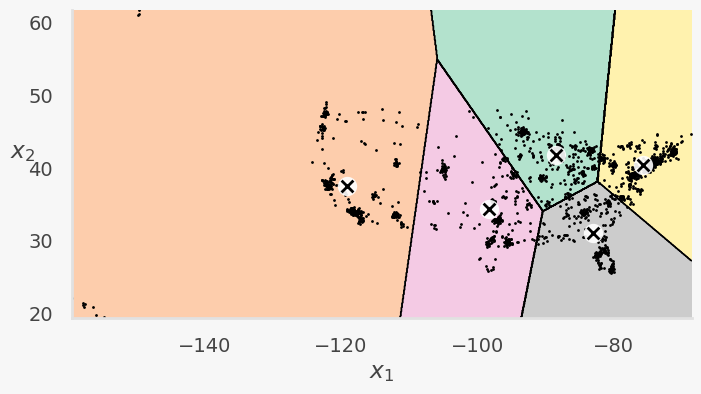

In [217]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    W=Z

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)


plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Clusters2=kmeans.cluster_centers_


findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

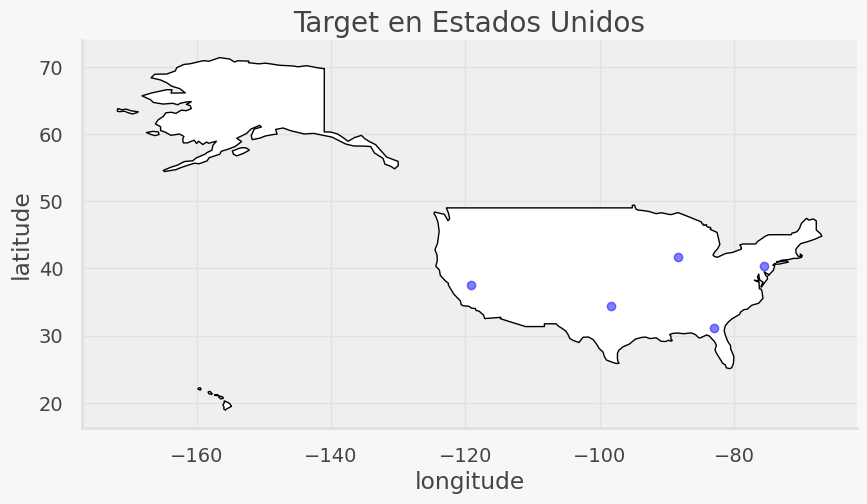

In [218]:
mappita(Clusters2)

In [219]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(Clusters2, X)
closest
users=df['address'].values
for row in closest:
    print(users[row])


910 Eastlake Pkwy, Chula Vista, CA 91914-3558
8800 Whittier Blvd, Pico Rivera, CA 90660-2658
10801 Westheimer Rd, Houston, TX 77042-3201
660 S Grand Ave, Sun Prairie, WI 53590-9832
4701 N Illinois St, Fairview Heights, IL 62208-3416


In [220]:
from mpl_toolkits.mplot3d import Axes3D

# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['ALmacen 1','Almacen 2 ','Almacen 3','Almacen 4 ','Almacen 5 ']
asignar=[]


In [221]:
copy =  pd.DataFrame()
copy['usuario']=df['latitude'].values
copy['categoria']=df['longitude'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['Tienda']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,Tienda,cantidad
0,ALmacen 1,427
1,Almacen 2,368
2,Almacen 3,292
3,Almacen 4,480
4,Almacen 5,272


findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

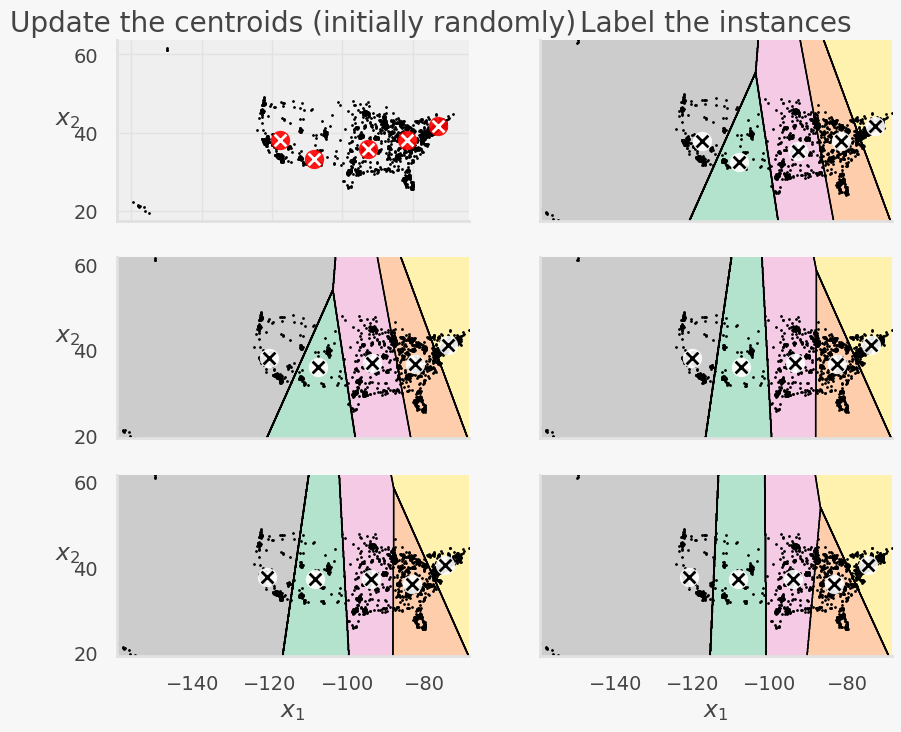

In [222]:

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1,
                      random_state=5)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=2,
                      random_state=5)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=3,
                      random_state=5)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,
                         show_ylabels=False)
plt.title("Label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,
                         show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [223]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(kmeans_iter1.cluster_centers_, X)
users=df['address'].values
for row in closest:
    print(users[row])


150 E Stacy Rd, Allen, TX 75002-8756
3489 Lowery Pkwy, Fultondale, AL 35068-1677
1900 CHESTNUT ST, Philadelphia, PA 19103-4610
449 Howe Ave, Cuyahoga Falls, OH 44221-4943
25901 Highway 290, Cypress, TX 77429-1099


In [224]:
# Predicting the clusters
labels = kmeans_iter1.predict(X)
# Getting the cluster centers
C = kmeans_iter1.cluster_centers_
colores=['ALmacen 1','Almacen 2 ','Almacen 3','Almacen 4 ','Almacen 5 ']
asignar=[]


In [225]:
copy =  pd.DataFrame()
copy['usuario']=df['latitude'].values
copy['categoria']=df['longitude'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['Tienda']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,Tienda,cantidad
0,ALmacen 1,115
1,Almacen 2,634
2,Almacen 3,450
3,Almacen 4,317
4,Almacen 5,323


In [226]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(kmeans_iter2.cluster_centers_, X)
users=df['address'].values
for row in closest:
    print(users[row])

195 River Rd, Lisbon, CT 06351-3253
820 Oviedo Mall Blvd, Oviedo, FL 32765-9348
203 S Broadway, Salem, NH 03079-3311
10720 SW Village Pkwy, Port Saint Lucie, FL 34987-2188
8401 S Tamiami Trl, Sarasota, FL 34238-2927


In [227]:
# Predicting the clusters
labels = kmeans_iter2.predict(X)
# Getting the cluster centers
C = kmeans_iter2.cluster_centers_
colores=['ALmacen 1','Almacen 2 ','Almacen 3','Almacen 4 ','Almacen 5 ']
asignar=[]


In [228]:
copy =  pd.DataFrame()
copy['usuario']=df['latitude'].values
copy['categoria']=df['longitude'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['Tienda']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,Tienda,cantidad
0,ALmacen 1,136
1,Almacen 2,579
2,Almacen 3,432
3,Almacen 4,391
4,Almacen 5,301


In [229]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(kmeans_iter3.cluster_centers_, X)
users=df['address'].values
for row in closest:
    print(users[row])

195 River Rd, Lisbon, CT 06351-3253
6700 Topanga Canyon Blvd, Canoga Park, CA 91303-2624
203 S Broadway, Salem, NH 03079-3311
1664 W Division St, Chicago, IL 60622-3922
600 Kirkwood Mall, Bismarck, ND 58504-5704


In [230]:
# Predicting the clusters
labels = kmeans_iter3.predict(X)
# Getting the cluster centers
C = kmeans_iter3.cluster_centers_
colores=['ALmacen 1','Almacen 2 ','Almacen 3','Almacen 4 ','Almacen 5 ']
asignar=[]


In [231]:
copy =  pd.DataFrame()
copy['usuario']=df['latitude'].values
copy['categoria']=df['longitude'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['Tienda']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,Tienda,cantidad
0,ALmacen 1,140
1,Almacen 2,561
2,Almacen 3,428
3,Almacen 4,414
4,Almacen 5,296


findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

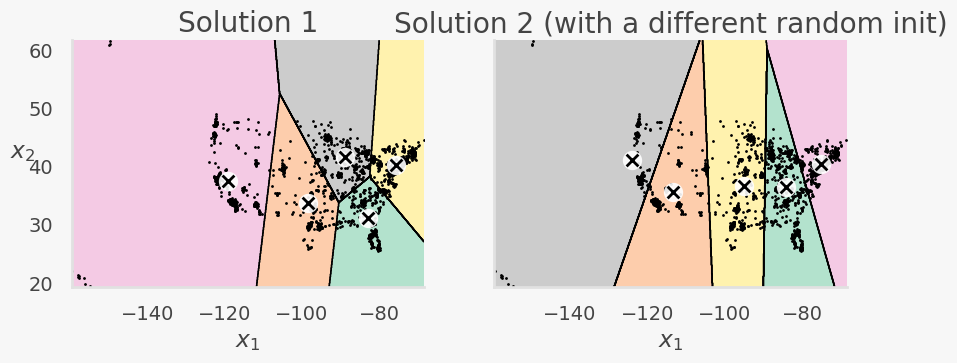

In [232]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None,
                              title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5,init="random", n_init=1, random_state=9)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1",
                          "Solution 2 (with a different random init)")

plt.show()

In [233]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(kmeans_rnd_init1.cluster_centers_, X)
users = df['address'].values
for row in closest:
    print(users[row])

4701 N Illinois St, Fairview Heights, IL 62208-3416
1280 Auto Park Way, Escondido, CA 92029-2231
8800 Whittier Blvd, Pico Rivera, CA 90660-2658
660 S Grand Ave, Sun Prairie, WI 53590-9832
7003 S Broadway Ave, Tyler, TX 75703-4737


findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

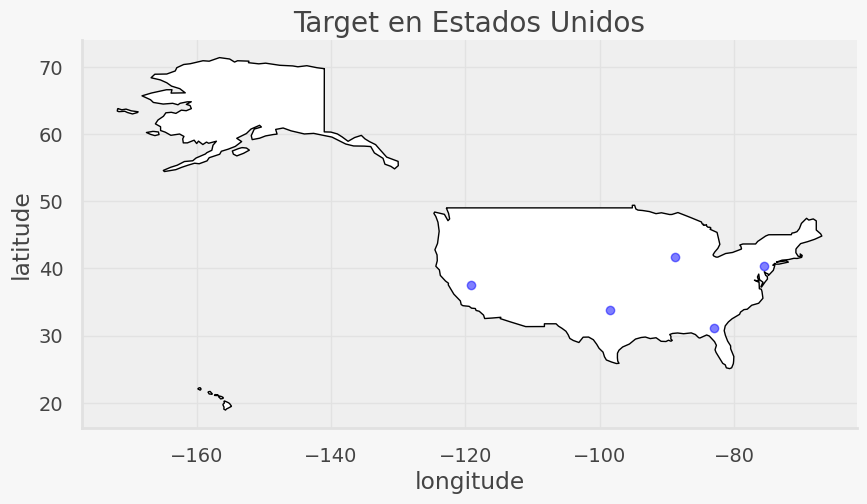

In [234]:
mappita(kmeans_rnd_init1.cluster_centers_)

In [235]:

# Predicting the clusters
labels = kmeans_rnd_init1.predict(X)
# Getting the cluster centers
C = kmeans_rnd_init1.cluster_centers_
colores = ['ALmacen 1', 'Almacen 2 ', 'Almacen 3', 'Almacen 4 ', 'Almacen 5 ']
asignar = []

copy = pd.DataFrame()
copy['usuario'] = df['latitude'].values
copy['categoria'] = df['longitude'].values
copy['label'] = labels;
cantidadGrupo = pd.DataFrame()
cantidadGrupo['Tienda'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()
cantidadGrupo

,Tienda,cantidad
0,ALmacen 1,274
1,Almacen 2,270
2,Almacen 3,368
3,Almacen 4,484
4,Almacen 5,443


In [236]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(kmeans_rnd_init2.cluster_centers_, X)
users = df['address'].values
for row in closest:
    print(users[row])

4300 24th Ave, Fort Gratiot, MI 48059-3806
60 Longview Dr, Bangor, ME 04401-3629
2200 Dallas Pkwy, Plano, TX 75093-4300
1465 E Mall Dr, Holland, OH 43528-9490
500 Skyview Centre Pkwy, Rochester, NY 14622-2486


findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

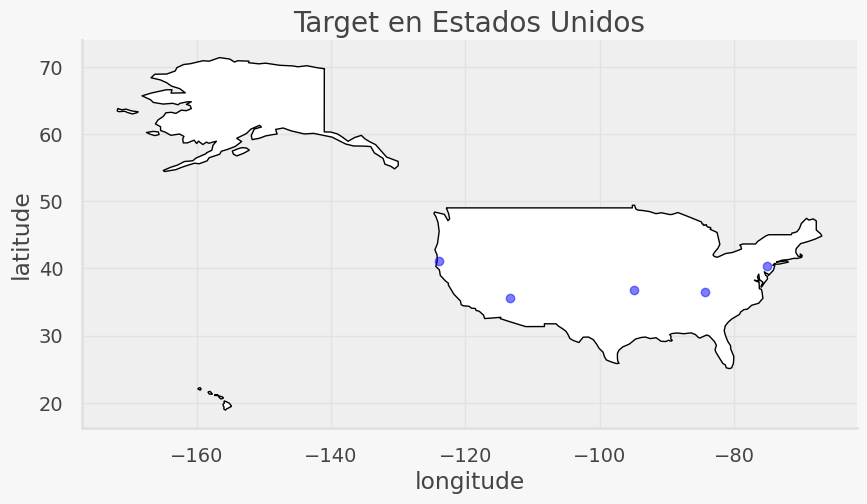

In [237]:
mappita(kmeans_rnd_init2.cluster_centers_)

In [238]:

# Predicting the clusters
labels = kmeans_rnd_init2.predict(X)
# Getting the cluster centers
C = kmeans_rnd_init2.cluster_centers_
colores = ['ALmacen 1', 'Almacen 2 ', 'Almacen 3', 'Almacen 4 ', 'Almacen 5 ']
asignar = []

copy = pd.DataFrame()
copy['usuario'] = df['latitude'].values
copy['categoria'] = df['longitude'].values
copy['label'] = labels;
cantidadGrupo = pd.DataFrame()
cantidadGrupo['Tienda'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()
cantidadGrupo

,Tienda,cantidad
0,ALmacen 1,581
1,Almacen 2,270
2,Almacen 3,444
3,Almacen 4,387
4,Almacen 5,157


In [239]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

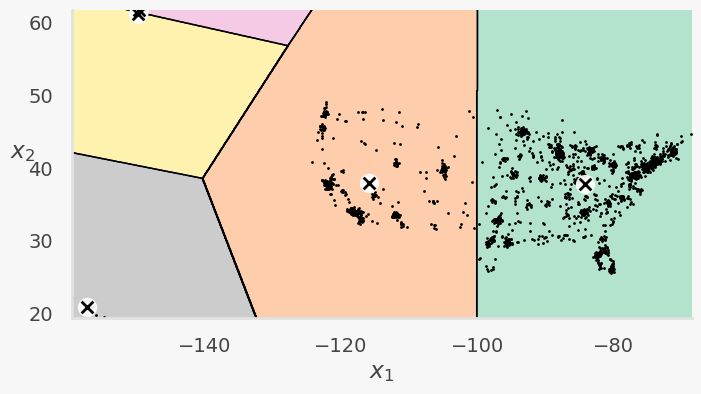

In [240]:
# extra code
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

In [241]:
kmeans.inertia_

150762.99458660674

In [242]:
kmeans_rnd_init1.inertia_  # extra code

62084.34548589635

In [243]:

kmeans_rnd_init2.inertia_  # extra code

73145.48229260268

In [244]:
X_dist = kmeans.transform(X)
(X_dist[np.arange(len(X_dist)), kmeans.labels_] ** 2).sum()

150762.994586607

In [245]:
kmeans.score(X)

-150762.99458660674

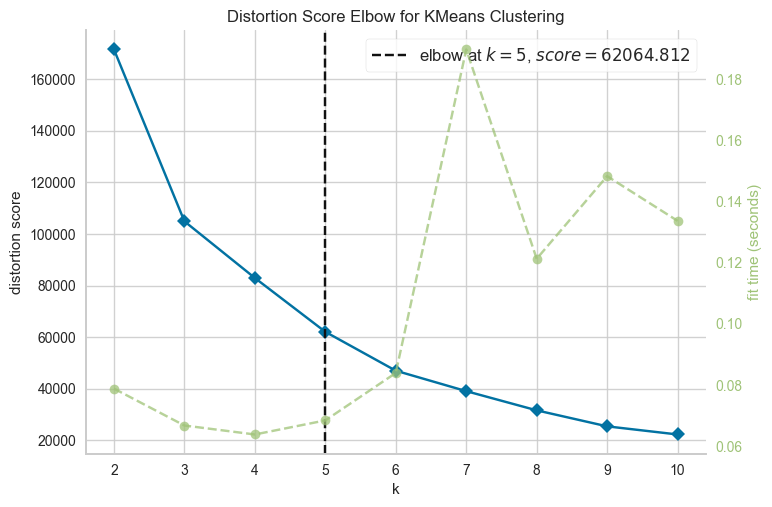

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [266]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KElbowVisualizer(KMeans(), k=10)
model.fit(X)
model.show()

In [268]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=50,
                             random_state=10)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=50, random_state=10)

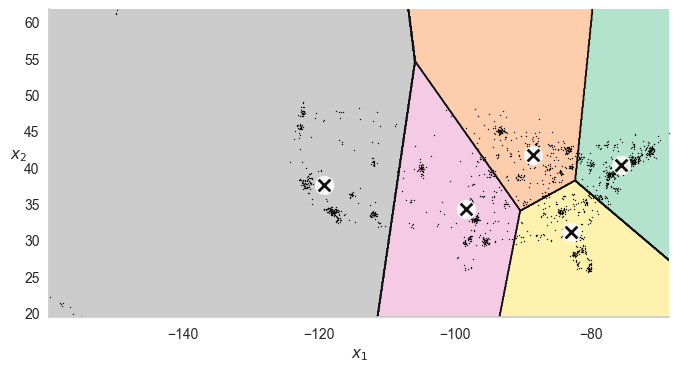

In [269]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [270]:
name = df["address"].str.split(',',expand=True)
name
name.columns = ['direccion', 'Ciudad','Estado','nada']
name
ciudad=name["Estado"].str.split(expand=True)
ciudad=ciudad[0]


In [271]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(kmeans_rnd_10_inits.cluster_centers_, X)

users = ciudad.values
ciudades= list()
for row in closest:
    ciudades.append(users[row])

print(ciudades)

['WI', 'CA', 'TX', 'IL', 'CA']


In [272]:
def unique(list1):

    # initialize a null list
    unique_list = []

    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)

In [273]:
dfcitis=pd.DataFrame(ciudades)

In [274]:
unique(ciudades)

WI
CA
TX
IL


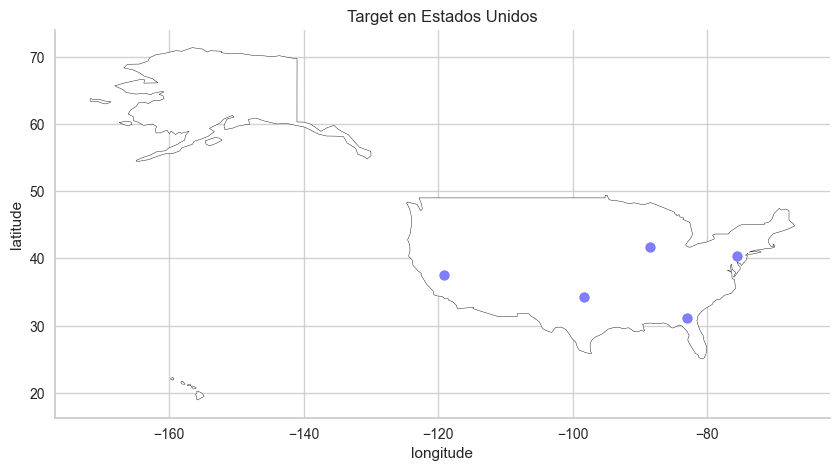

In [275]:
mappita(kmeans_rnd_10_inits.cluster_centers_)

### Encuentra las latitudes y longitudes de los almacenes, ¿que ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estara?
 -- Despues de correr varias veces el sistema y llegar los mejore valores se encontro que las ciudades donde conviene poner un alamcen son las mostradas en la siguiente tabla
 -- La cantidad de tiendas a la que surtira son tambien mostradas en la tabla
 -- La distancia exacta a la que estara de cada una de las tiendas es mostrada en la tabla 2 la cual nos muesta la distancia de cada almacen a cada tienda

In [276]:
# Predicting the clusters
labels = kmeans_rnd_10_inits.predict(X)
# Getting the cluster centers
C = kmeans_rnd_10_inits.cluster_centers_
colores = dfcitis
asignar = []
print('Tabla 1 Ciudad y Cuantas Tiendas Cubre')
copy = pd.DataFrame()
copy['usuario'] = df['latitude'].values
copy['categoria'] = df['longitude'].values
copy['label'] = labels;
cantidadGrupo = pd.DataFrame()
cantidadGrupo['Tienda'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()
cantidadGrupo

,Tienda,cantidad
0,WI,481
1,CA,429
2,TX,289
3,IL,272
4,CA,368


In [292]:
print('Tabla 2 Que tan lejos esta de cada punto cada tienda')
Distancia=pd.DataFrame(kmeans.transform(X).round(2))
Distancia=Distancia.set_axis(dfcitis,axis=1)
Distancia=Distancia.set_axis(ciudad,axis=0)
Distancia


Tabla 2 Que tan lejos esta de cada punto cada tienda


,"(WI,)","(CA,)","(TX,)","(IL,)","(CA,)"
0,,,,,
AL,6.33,34.90,74.35,74.24,76.63
AL,2.95,29.41,68.16,68.06,72.33
AL,39.74,10.70,30.97,30.79,42.22
AL,10.88,42.20,78.63,78.60,85.86
AL,12.34,37.74,78.19,78.05,77.45
...,...,...,...,...,...
WI,33.79,4.74,42.63,42.36,41.52
WI,4.77,30.99,67.24,67.20,75.19
WY,39.36,10.42,31.31,31.13,42.50


In [278]:
kmeans_rnd_10_inits.inertia_

62066.147302819285




### ¿Cómo elegiste el numero de almacenes?, justifica tu respuesta tecnicamente?
Inicialmente se decido analizar la opcion de tener el mismo numero de almacenes que unda de las empresas mas grandes del mundo la cual es Bimbo, donde ellos tienenun total de 64 Almacenes alrededor de todo Mexico
Despues de esto se econtro que la mejor opcion para esto es calcular el elbow de K y asi obtener la mejor respuesta dejando de lado los puntos que estan muy fuera de lo esperado como Alaska y la isla de puerto rico, para este punto es interesante poder visulizar otras grandes emprezas como amazon y alli express que tienen casi la misma distribucuin de almacenes que lo calculado  y de la mimsa forma dejando de lado Alaska y puerto rico , ya que Alaska es un mercado temporal y puerto rico recibe los pedidos desde los estados unidos de los almacenes principales



Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, despues nos auxiliamos de una librería de datos geograficos.

### ¿qué librerías nos pueden ayudar a graficar este tipo de datos?
Esta ves utilizamos varias librerias , existen otras como folium y Geopandas siendo las  utilizadas el dia de hoy

Existen otras librerias como:
    1. ArcPy
    2. Cartopy
    3. Folium
    4. GDAL/OGR
    5. Geemap
    6. GeoPandas
    7. GeoPy
    8. LiDAR

Todas estas librerias son enfocadas en datos gis, los cuales son concidos como datos geograficos, su importancia dentro del medio es muy necesaria ya que nos ayudan a entnder mejor los datos
podriamos pensar que cierto tipo de datos son atipicos o estan mal pocisionados sin embargo como enesta caso no es que fueran atipicos si no que estaban en un lugar diferente  geograficamente


### ¿Consideras importante que se grafique en un mapa?, ¿por qué?
Si es necesario para tener de forma grafica una idea de que es lo que estamos buscando y necesitamos encontrar y en este caso nos ayuda a entender donde poner el almacen y ubicarlo de forma facil dentro del sistema


### Agrega las conclusiones
El uso de herramientas como esta nos ayuda a poder predecir de forma mas precisa donde etablecer un nuevo objetivo no solo para tienda o cosas asi si no tambien para sistemas de vision y sensores donde tenemos una gran cantidad de datos y queremos tomar una muestra representativa del grupo
